In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/lahore-electricity-data/merged.csv')

df.drop(columns=['Unnamed: 0'], inplace=True)

df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,JUL-22,AUG-22,SEP-22,OCT-22,NOV-22,DEC-22,JAN-23,FEB-23,MAR-23,APR-23,...,JUN-23,Feeder,Sub-Division,Division,JUL-23,Last_year_change,Last_year_month,Address,Customer ID,AUG-23
0,593.0,576.0,580.0,383.0,280.0,184.0,83.0,119.0,82.0,108.0,...,261.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,173.0,;↓-70.83%,JUL-22,H-3495D INS LOHARI GATE LHR,2416501,NaN
1,492.0,535.0,421.0,272.0,171.0,157.0,146.0,134.0,187.0,331.0,...,232.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,237.0,;↓-51.83%,JUL-22,D/3788 CHOWK BUKHARI 119 LAHORI GATE LHR,2416505,NaN
2,100.0,112.0,115.0,91.0,106.0,90.0,68.0,73.0,99.0,104.0,...,92.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,98.0,↓-2%,JUL-22,3789/D BUKHARY CHOWK I/S LAHORI GATE LAHORE.,2416506,NaN
3,75.0,86.0,88.0,41.0,45.0,55.0,42.0,50.0,43.0,47.0,...,77.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,99.0,↑32%,JUL-22,SHOP3788 OH CHAKLA IS LOHARIGA LHR,2416507,NaN
4,0.0,0.0,0.0,0.0,6.0,16.0,15.0,12.0,9.0,59.0,...,5.0,SAID MITHA (004011),SHERANWALA GATE,DATA DARBAR,649.0,;↑100%,JUL-22,SHOP 3787D SUTTER MANDI LHR,2416508,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179344,NaN,366.0,461.0,307.0,178.0,131.0,143.0,90.0,112.0,144.0,...,286.0,RABANI MASJID (078101),D.H.A. EAST,DEFENCE EAST,129.0,↓-83.06%,AUG-22,NISHAT CLNY,9924795,62.0
4179345,NaN,58.0,36.0,28.0,13.0,3.0,15.0,96.0,84.0,167.0,...,235.0,KARAM ALI SHAH (078121),D.H.A. EAST,DEFENCE EAST,324.0,;↑355.17%,AUG-22,NISHAT CLNY,9924796,264.0
4179346,NaN,19.0,34.0,33.0,15.0,10.0,6.0,6.0,5.0,10.0,...,19.0,KARAM ALI SHAH (078121),D.H.A. EAST,DEFENCE EAST,18.0,↓-21.05%,AUG-22,NISHAT CLNY,9924797,15.0
4179347,NaN,14.0,24.0,12.0,43.0,55.0,64.0,48.0,49.0,49.0,...,41.0,KARAM ALI SHAH (078121),D.H.A. EAST,DEFENCE EAST,42.0,↑100%,AUG-22,NISHAT CLNY,9924798,28.0


### We want to use data from AUG-22 Till Jul-23. 

Useful Columns: 

- AUG-22 -> Jul-23
- Feeder
- Division
- Sub-Division
- Customer ID
- Address

In [3]:
df_clean = df[['AUG-22', 'SEP-22', 'OCT-22', 'NOV-22', 'DEC-22', 'JAN-23', 'FEB-23', 'MAR-23', 'APR-23', 'MAY-23', 'JUN-23', 'JUL-23', 'Sub-Division', 'Division','Feeder', 'Customer ID', 'Address']]

df_clean

,AUG-22,SEP-22,OCT-22,NOV-22,DEC-22,JAN-23,FEB-23,MAR-23,APR-23,MAY-23,JUN-23,JUL-23,Sub-Division,Division,Feeder,Customer ID,Address
0,576.0,580.0,383.0,280.0,184.0,83.0,119.0,82.0,108.0,199.0,261.0,173.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416501,H-3495D INS LOHARI GATE LHR
1,535.0,421.0,272.0,171.0,157.0,146.0,134.0,187.0,331.0,317.0,232.0,237.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416505,D/3788 CHOWK BUKHARI 119 LAHORI GATE LHR
2,112.0,115.0,91.0,106.0,90.0,68.0,73.0,99.0,104.0,93.0,92.0,98.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416506,3789/D BUKHARY CHOWK I/S LAHORI GATE LAHORE.
3,86.0,88.0,41.0,45.0,55.0,42.0,50.0,43.0,47.0,32.0,77.0,99.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416507,SHOP3788 OH CHAKLA IS LOHARIGA LHR
4,0.0,0.0,0.0,6.0,16.0,15.0,12.0,9.0,59.0,6.0,5.0,649.0,SHERANWALA GATE,DATA DARBAR,SAID MITHA (004011),2416508,SHOP 3787D SUTTER MANDI LHR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179344,366.0,461.0,307.0,178.0,131.0,143.0,90.0,112.0,144.0,220.0,286.0,129.0,D.H.A. EAST,DEFENCE EAST,RABANI MASJID (078101),9924795,NISHAT CLNY
4179345,58.0,36.0,28.0,13.0,3.0,15.0,96.0,84.0,167.0,255.0,235.0,324.0,D.H.A. EAST,DEFENCE EAST,KARAM ALI SHAH (078121),9924796,NISHAT CLNY
4179346,19.0,34.0,33.0,15.0,10.0,6.0,6.0,5.0,10.0,22.0,19.0,18.0,D.H.A. EAST,DEFENCE EAST,KARAM ALI SHAH (078121),9924797,NISHAT CLNY
4179347,14.0,24.0,12.0,43.0,55.0,64.0,48.0,49.0,49.0,33.0,41.0,42.0,D.H.A. EAST,DEFENCE EAST,KARAM ALI SHAH (078121),9924798,NISHAT CLNY


In [4]:
df_clean.columns

Index(['AUG-22', 'SEP-22', 'OCT-22', 'NOV-22', 'DEC-22', 'JAN-23', 'FEB-23',
       'MAR-23', 'APR-23', 'MAY-23', 'JUN-23', 'JUL-23', 'Sub-Division',
       'Division', 'Feeder', 'Customer ID', 'Address'],
      dtype='object')

### Remove Consumers with no consumptions 

These are unused electricity meters, so they are outliers

In [5]:
zero_consumers = (df_clean[['AUG-22', 'SEP-22', 'OCT-22', 'NOV-22', 'DEC-22',
                            'JAN-23', 'FEB-23', 'MAR-23', 'APR-23',
                            'MAY-23', 'JUN-23', 'JUL-23']].sum(axis=1) == 0)

df_clean = df_clean[~zero_consumers].reset_index(drop=True)

print(f"Remaining users: {len(df_clean)}")


Remaining users: 4169231


### Reshape the data for better time-series analysis

Each row will represent 1 month for one user. So each user will now have 12 rows, one for each month's consumption.

In [6]:
df_long = df_clean.melt(
    id_vars=['Customer ID', 'Address', 'Sub-Division', 'Division', 'Feeder'],
    value_vars=['AUG-22', 'SEP-22', 'OCT-22', 'NOV-22', 'DEC-22',
                'JAN-23', 'FEB-23', 'MAR-23', 'APR-23', 'MAY-23', 'JUN-23', 'JUL-23'],
    var_name='Month',
    value_name='Units_Consumed'
)

df_long['Month'] = pd.to_datetime(df_long['Month'], format='%b-%y')
df_long = df_long.sort_values(by=['Customer ID', 'Month']).reset_index(drop=True)


In [7]:
df_long.columns

Index(['Customer ID', 'Address', 'Sub-Division', 'Division', 'Feeder', 'Month',
       'Units_Consumed'],
      dtype='object')

In [8]:
df_long.head(12)

,Customer ID,Address,Sub-Division,Division,Feeder,Month,Units_Consumed
0,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-08-01,299.0
1,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-09-01,271.0
2,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-10-01,393.0
3,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-11-01,429.0
4,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2022-12-01,797.0
5,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2023-01-01,669.0
6,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2023-02-01,2620.0
7,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2023-03-01,2819.0
8,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2023-04-01,2986.0
9,2000004,MILLAT ROAD HAD BAST MOUZA SANDA KALAN LHR,SANDA,GULSHN-E-RAV,MEHMOOD SHAH (035723),2023-05-01,6728.0


### Monthly Electricity Usage Trend

- Seasonal patterns
- High summer consumption, low winter consumption etc

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


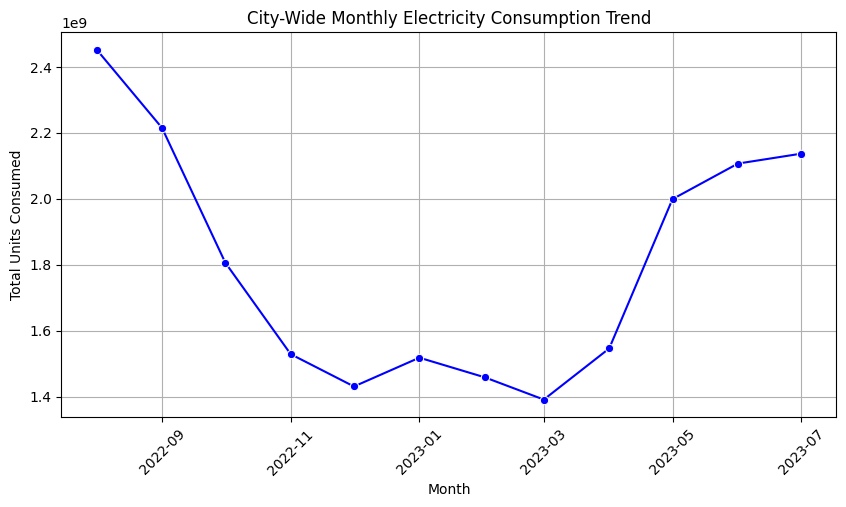

In [9]:
# Group data by month and sum the consumption
monthly_trend = df_long.groupby('Month')['Units_Consumed'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='Month', y='Units_Consumed', marker='o', color='blue')
plt.title("City-Wide Monthly Electricity Consumption Trend")
plt.ylabel("Total Units Consumed")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Look at the size of each division (No. of consumers)

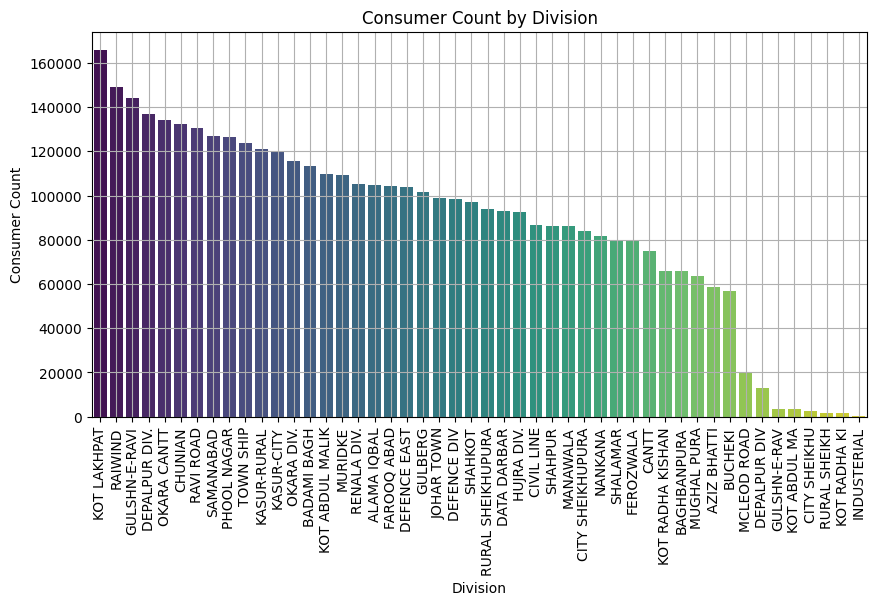

In [10]:
dvision_consumers_count = df_clean['Division'].value_counts().reset_index()
dvision_consumers_count.columns = ['Division', 'Consumer Count']

plt.figure(figsize=(10, 5))
sns.barplot(data=dvision_consumers_count, x='Division', y='Consumer Count', palette='viridis')
plt.title("Consumer Count by Division")
plt.ylabel("Consumer Count")
plt.xlabel("Division")
plt.xticks(rotation=90)
plt.grid(True)

### Divison-wise consumption comparison

- Do some divisions consume more electricity? 

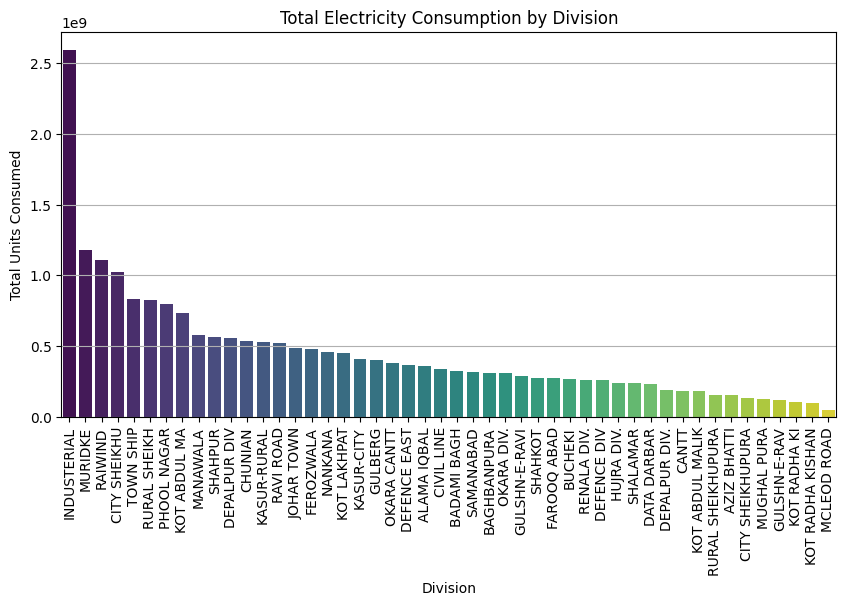

In [11]:
division_consumption = df_long.groupby('Division')['Units_Consumed'].sum().reset_index().sort_values('Units_Consumed', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=division_consumption, x='Division', y='Units_Consumed', palette="viridis")
plt.title("Total Electricity Consumption by Division")
plt.ylabel("Total Units Consumed")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


### `Industerial` Division has the highest total consumption. See its Monthly Variation

- High consumption in Jan and Feb
- Only partially follows season demands
- Units consumed per consumer are significantly higher compared to any other division


Number of consumers are lowest, but the consumption for Industrial is still highest, mainly due to some high value consumers in that division

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([19236., 19297., 19358., 19417., 19478., 19539.]),
 [Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07')])

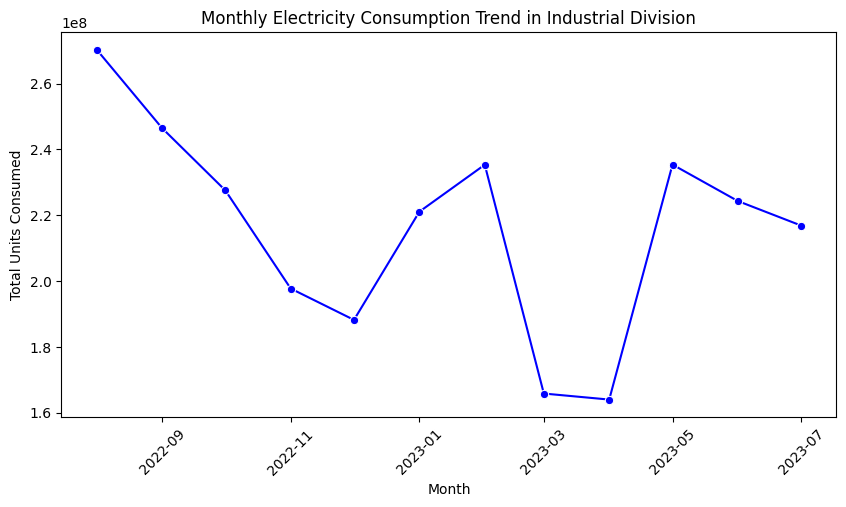

In [12]:
industrial_div_df = df_long[df_long['Division'] == 'INDUSTERIAL']

# plot monthly bar graph
monthly_trend = industrial_div_df.groupby('Month')['Units_Consumed'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='Month', y='Units_Consumed', marker='o', color='blue')
plt.title("Monthly Electricity Consumption Trend in Industrial Division")
plt.ylabel("Total Units Consumed")
plt.xlabel("Month")
plt.xticks(rotation=45)

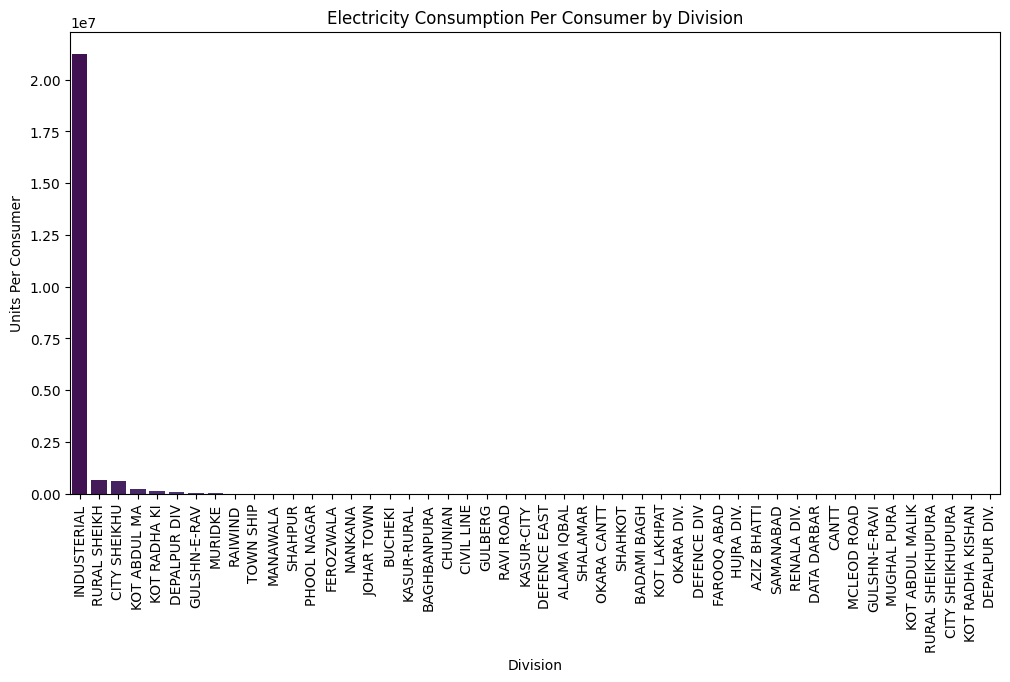

In [13]:
# Group data by division to sum up consumption and count consumers
division_summary = df_long.groupby('Division').agg(
    total_consumption=('Units_Consumed', 'sum'),
    num_consumers=('Customer ID', 'nunique')
).reset_index()

# Calculate consumption per consumer
division_summary['consumption_per_consumer'] = (
    division_summary['total_consumption'] / division_summary['num_consumers']
)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=division_summary.sort_values('consumption_per_consumer', ascending=False),
            x='Division', y='consumption_per_consumer', palette='viridis')
plt.xticks(rotation=90)
plt.title('Electricity Consumption Per Consumer by Division')
plt.ylabel('Units Per Consumer')
plt.xlabel('Division')
plt.show()


### Seasonal Trends (Summer vs Winter)

In [14]:
# Define months for summer and winter
summer_months = [5, 6, 7, 8]
winter_months = [11, 12, 1, 2]   

def categorize_season(row):
    month = row.month
    if month in summer_months:
        return 'Summer'
    elif month in winter_months:
        return 'Winter'
    else:
        return 'Other'

df_long['Season'] = df_long['Month'].apply(categorize_season)

In [15]:
df_long.columns

Index(['Customer ID', 'Address', 'Sub-Division', 'Division', 'Feeder', 'Month',
       'Units_Consumed', 'Season'],
      dtype='object')

### Average Season consumption trends for all consumers

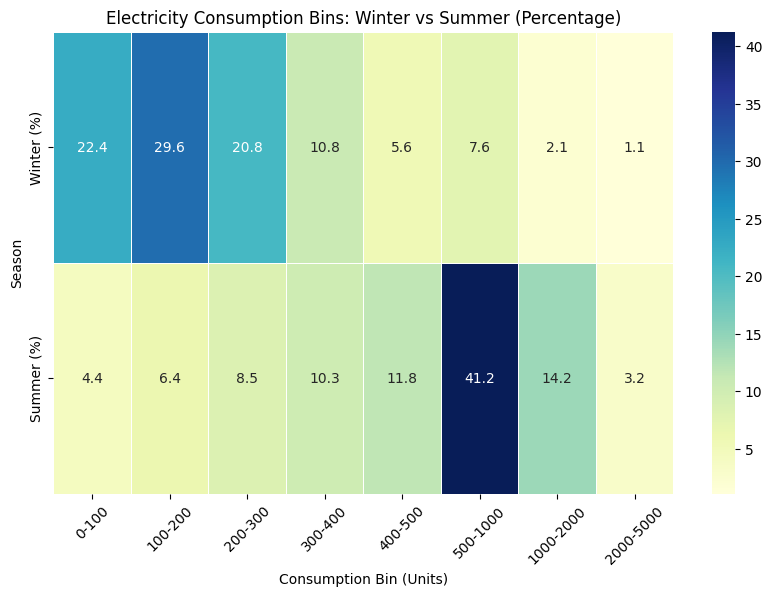

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define winter and summer months
winter_months = [12, 1, 2]
summer_months = [6, 7, 8]

# Convert month to numeric if needed
df_long['Month'] = pd.to_datetime(df_long['Month']).dt.month

# Filter data for winter and summer
winter_data = df_long[df_long['Month'].isin(winter_months)]
summer_data = df_long[df_long['Month'].isin(summer_months)]

# Aggregate monthly consumption per customer
winter_consumption = winter_data.groupby('Customer ID')['Units_Consumed'].sum().reset_index()
summer_consumption = summer_data.groupby('Customer ID')['Units_Consumed'].sum().reset_index()

# Define consumption bins
bins = list(range(0, 501, 100))  + [1000, 2000, 5000]
bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Assign bins to winter and summer data
winter_consumption['bin'] = pd.cut(winter_consumption['Units_Consumed'], bins=bins, labels=bin_labels, right=False)
summer_consumption['bin'] = pd.cut(summer_consumption['Units_Consumed'], bins=bins, labels=bin_labels, right=False)

# Count number of consumers per bin
winter_counts = winter_consumption['bin'].value_counts().reindex(bin_labels)
summer_counts = summer_consumption['bin'].value_counts().reindex(bin_labels)

# Convert counts to percentages
winter_percent = (winter_counts / winter_counts.sum()) * 100
summer_percent = (summer_counts / summer_counts.sum()) * 100

# Combine into a single DataFrame
heatmap_data = pd.DataFrame({
    'Winter (%)': winter_percent,
    'Summer (%)': summer_percent
}).T

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)

plt.title("Electricity Consumption Bins: Winter vs Summer (Percentage)")
plt.ylabel("Season")
plt.xlabel("Consumption Bin (Units)")
plt.xticks(rotation=45)
plt.show()

### Consumers Consuming < 150 units in summer months in each division. 

- This could be used to indicate the socio-economic conditions of a region

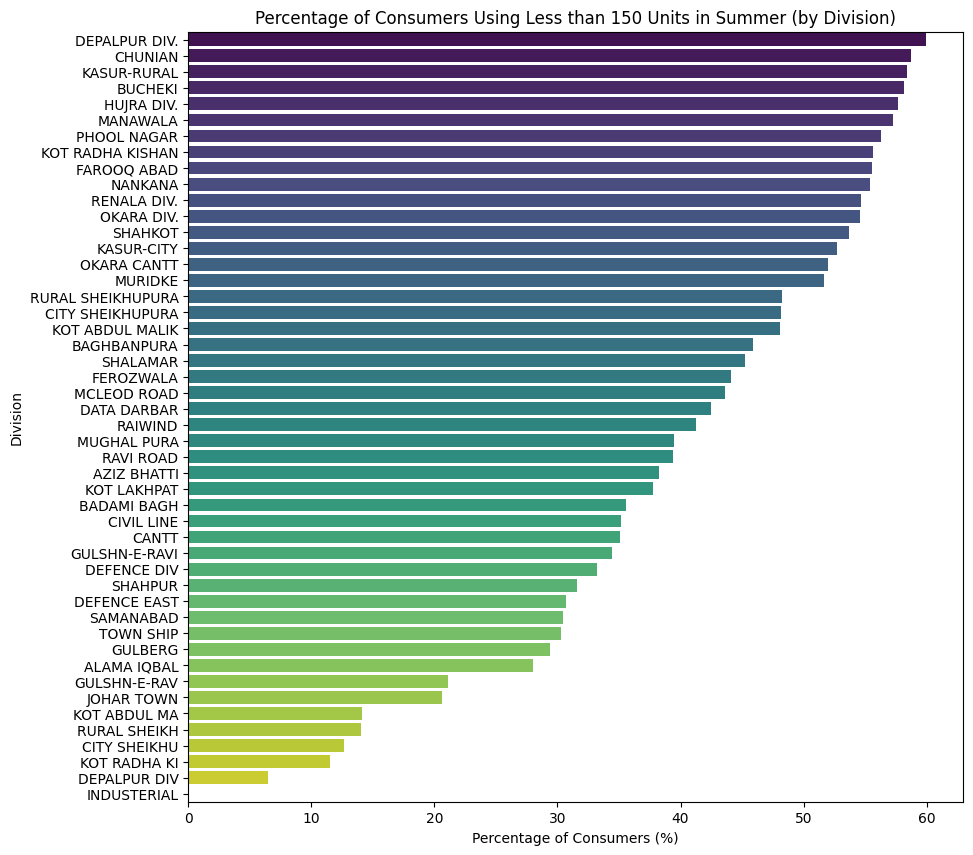

In [24]:
# Define summer months
summer_months = [6,7,8]

# Filter for summer data
summer_data = df_long[df_long['Month'].isin(summer_months)]

# Count total consumers per division
total_consumers_per_div = summer_data.groupby('Division')['Customer ID'].nunique()

# Count consumers consuming less than 200 units per division
low_consumers_per_div = summer_data[(summer_data['Units_Consumed'] < 150) & (summer_data['Units_Consumed'] > 50)].groupby('Division')['Customer ID'].nunique()

# Calculate percentage of low consumers per division
percent_low_consumers = (low_consumers_per_div / total_consumers_per_div * 100).fillna(0).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 10))
sns.barplot(x=percent_low_consumers.values, y=percent_low_consumers.index, palette='viridis')

plt.title('Percentage of Consumers Using Less than 150 Units in Summer (by Division)')
plt.xlabel('Percentage of Consumers (%)')
plt.ylabel('Division')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


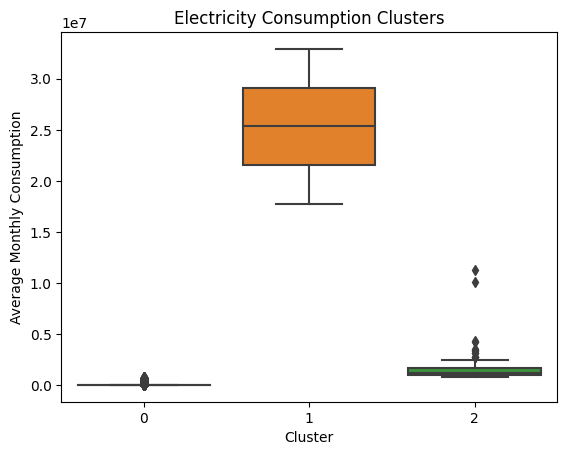

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Pivot data to get a table where each row is a consumer and columns are months
df_pivot = df_long.pivot_table(index='Customer ID', columns='Month', values='Units_Consumed', fill_value=0)

# Normalize data (optional, if needed for better clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pivot)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42) #3 clusters: to denote low, medium, high usage. we can increase clusters too
df_pivot['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing clusters
sns.boxplot(x=df_pivot['Cluster'], y=df_pivot.mean(axis=1))
plt.title("Electricity Consumption Clusters")
plt.xlabel("Cluster")
plt.ylabel("Average Monthly Consumption")
plt.show()

#cluster shows highest usage, which might imply industrial usage. cluster 0 shows lowest usage, which might imply residential usage. cluster 1 shows medium usage, which might imply commercial usage.


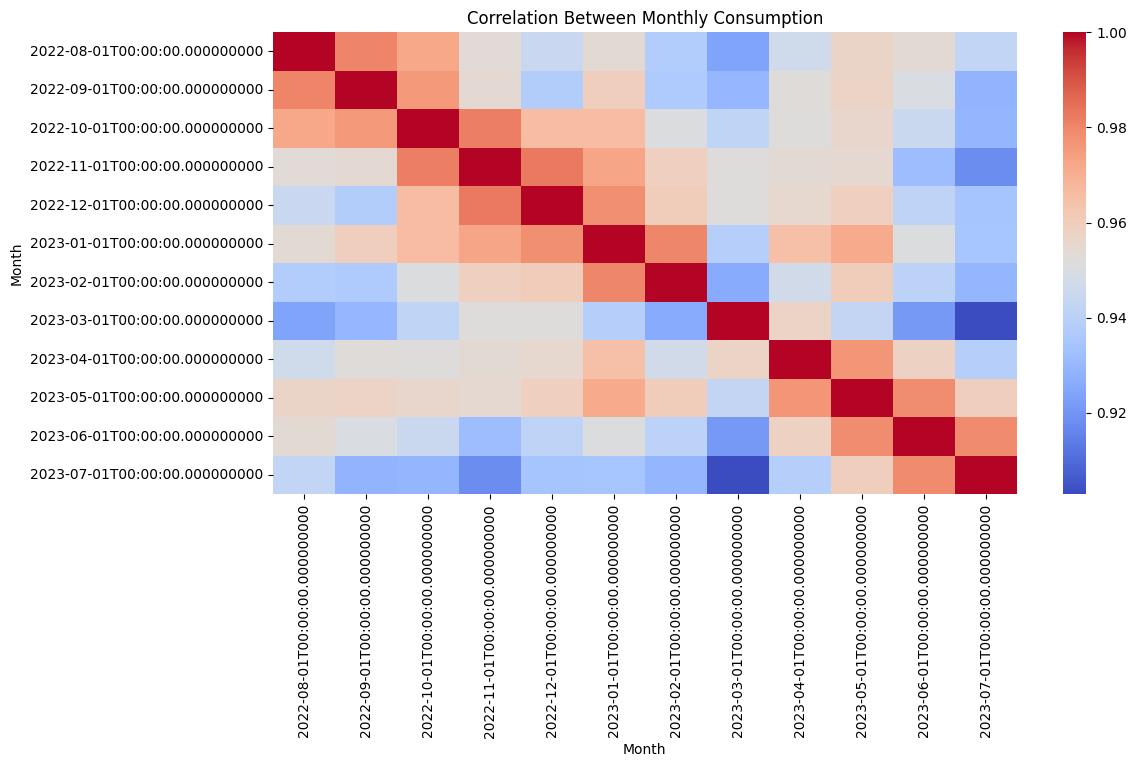

In [20]:
# Correlation heatmap to tell us how usage varies as time changes.
corr_matrix = df_long.pivot_table(index='Customer ID', columns='Month', values='Units_Consumed').corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Between Monthly Consumption")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

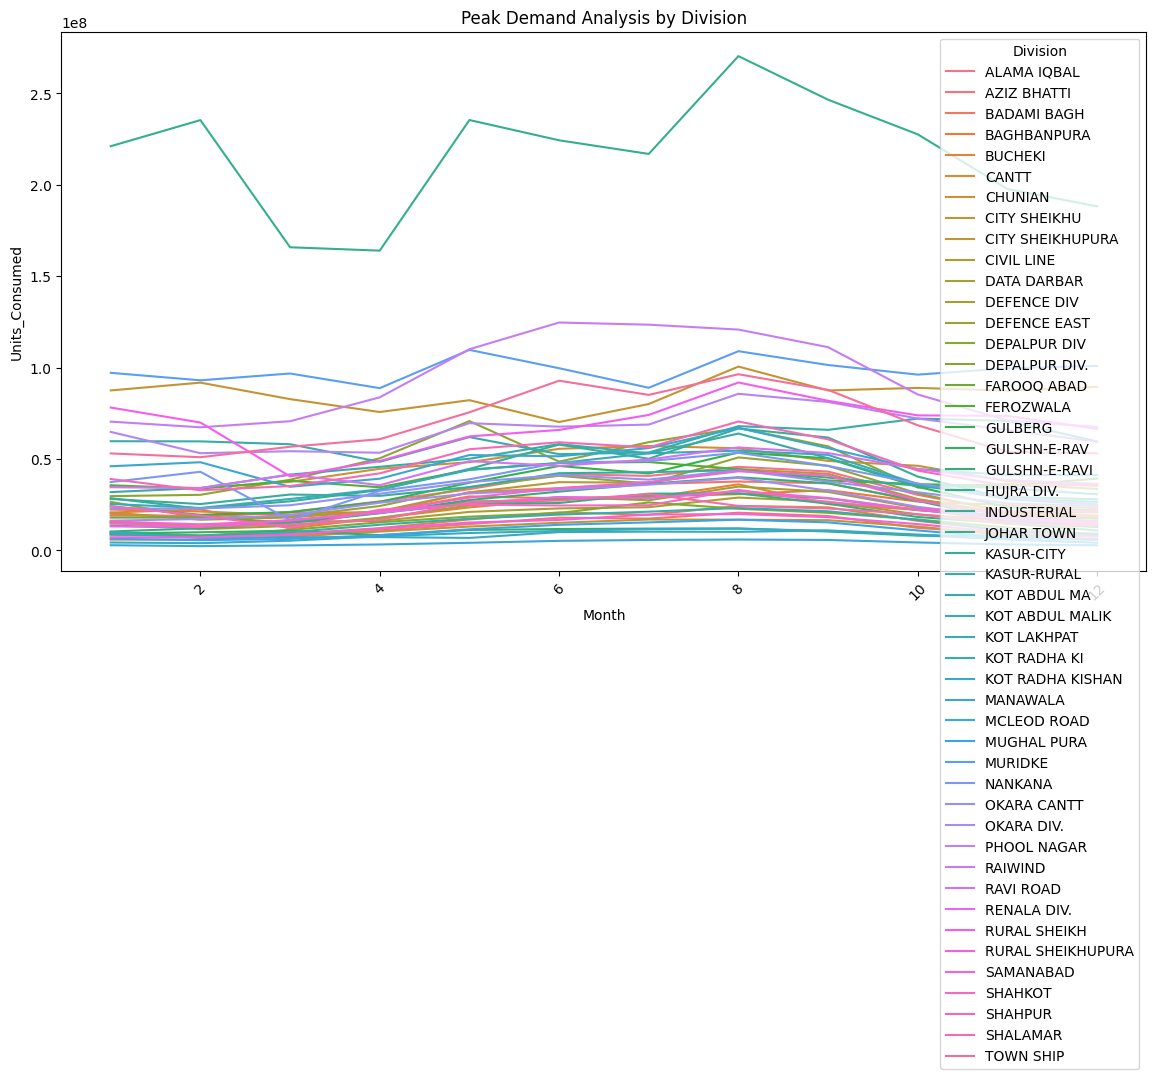

In [29]:
# Identify peak demand months per division
division_peak_month = df_long.groupby(['Division', 'Month'])['Units_Consumed'].sum().reset_index()
#convert inf to nan
division_peak_month = division_peak_month.replace([np.inf, -np.inf], np.nan)

# Plot division-wise monthly trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=division_peak_month, x='Month', y='Units_Consumed', hue='Division')
plt.xticks(rotation=45)
plt.title("Peak Demand Analysis by Division")
plt.show()